# Machine Learning Algorithms for Audio Classification

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk


%matplotlib inline

In [128]:
audio_data = np.load("audio_data.npy")

# 1440 files: 24 speakers, 60 recordings per speaker
# alternate male/female so can accurately label gender of speaker with if statement below
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    if (i<60 or (i>120 and i<180) or (i>240 and i<300) or (i>360 and i<420) or (i>480 and i<540) or
        (i>600 and i<660) or (i>720 and i<780) or (i>840 and i<900) or (i>960 and i<1020) or (i>1080 and i<1140)
        or (i>1200 and i<1260) or (i>1320 and i<1380)):
        label = "Male" 
    else:
        label = "Female"
    
    features.append([audio_data[i], label])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender"])

feature_df.head()

,mfcc,gender
0,"[-855.3770751953125, -855.3770751953125, -855....",Male
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male
3,"[-842.9385375976562, -843.2474975585938, -850....",Male
4,"[-911.1758422851562, -910.4053344726562, -905....",Male


In [139]:
X = np.array(feature_df.mfcc.tolist())

Y = np.array(feature_df.gender.tolist())

x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.25, random_state=0)

# default C = 1.0, gamma =  1 / (n_features * X.var())
svm = sk.svm.SVC()
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)

   Male  Female
0   174      13
1     9     164


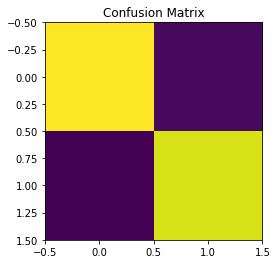

In [140]:
cm = sk.metrics.confusion_matrix(y_test, predictions)

df = pd.DataFrame(cm, columns=[Y[0], Y[60]])
print(df)

plt.figure(figsize=(10,4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.show()

In [141]:
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(cm)
    fp = np.sum(cm, axis=0) - tp
    precision = np.mean(tp/(tp+fp))
    return precision

svmprec = precision(cm)

print("Precision: " + str(svmprec))
cr = sk.metrics.classification_report(y_test, predictions)
print(cr)

Precision: 0.9386866722237659
              precision    recall  f1-score   support

      Female       0.95      0.93      0.94       187
        Male       0.93      0.95      0.94       173

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

